# Исследование объявлений о продаже квартир

Для изучения я взяла данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Моя задача - научиться определять рыночную стоимость объектов недвижимости. Для этого нужно установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<div style="border:solid black 4px; padding: 25px">  

### [Знакомство с данными](#section1)  
#### - [1.1 Описание данных](#section1.1)
### [Предобработка данных](#section2)  
#### - [2.1. Обработка выбросов:](#section2.1)  
  - [2.1.1. Высота потолков](#section2.1.1)  
  - [2.1.2. Число комнат](#section2.1.2)  
  - [2.1.3. Стоимость](#section2.1.3) 
  - [2.1.4. Общая площадь](#section2.1.4)
  
#### - [2.2. Заполнение пропусков:](#section2.2)  
  - [2.2.1. Заполнеие булевых значений](#section2.2.1)
  - [2.2.2. Пропущенные значения этажности](#section2.2.2)
  - [2.2.3. Пропущенные значения высоты потолков](#section2.2.3) 
  - [2.2.4. Пропущенные значения расстояний до ближайшего парка](#section2.2.4) 
  - [2.2.5. Заполнение оставшихся значений](#section2.2.5)
  - [2.2.6. Преобразование строки в формат времени](#section2.2.6)   
  - [Вывод](#section2.2.8)  
  
### [Дополнение данных](#section3)  
 - [3.1. Добавим цену за кв. метр. в таблицу, столбцы с днем недели, месяцем и годом](#section3.1)  
 - [3.2. Столбец с этажом: первый, последний, другой](#section3.2)  
 - [3.3. Добавим отношение жилой площади и кухник общей площади](#section3.3)   
 
### [Исследовательский анализ данных](#section4)  
 - [4.1.  Краткое изучение данных](#section4.1)  
 - [4.2.  Зависимость цены от расстояния до центра](#section4.2)  
 - [4.3.  Зависимость цены от площади и числа комнат](#section4.3)  
 - [4.4.  Зависимость стоимости квартиры от этажа](#section4.4)  
 - [4.5.  Как менялась стоимость квартир с 2014 года](#section4.5)  
 - [4.6.  Зависимость от даты продажы](#section4.6)  
 - [4.7.  Цены за квадратный метр](#section4.7)  
 - [4.8.  Анализ предложения апартаментов и поиск зависимости типа жилья и цены на недвижимость](#section4.8)  
 - [4.9.  Влияние факторов на стоимость квартиры в центре (*число комнат, этаж, удалённость от центра, дата размещения объявления*)](#section4.9)
 - [4.10. Зависимость от *даты*](#section4.10)  

### [Шаг 5. Общий вывод](#section5)  
</div>


<a id='section1'></a>

## Знакомство с данными

___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv("real_estate_data.csv", sep='\t')

<a id='section1.1'></a>

### Описание данных

In [3]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание переменных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [5]:
df.shape

(23699, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
df.duplicated().sum()

0

Данные не содержат дубликатов, поэтому можно переходить к обработке выбросов и заполнению пропусков.

<div style="border:solid black 2px; padding: 20px">
<b> Вывод: </b>

Данные содержат 23699 строк с информацией по 22 переменным, в датасете представлены целочисленные переменные, строковые, а также булевы и числа с плавающей точкой. В ходе работы нам предстоит перевести строковую переменную "first_day_exposition" в формат даты, заполнить пропуски там, где это уместно (например, в числе балконов - если данных нет - заменить на False), а также проверить выбросы. В данных видны аномалии: например, минимальная и максимальная высота потолков кажется нетипичной, а в некоторых кваритрах отсутсвуют комнаты.
</div>

<a id='section2'> </a>

# Предобработка данных

___

<a id='section 2.1'></a>

### Обработка выбросов 

<a id='section2.1.1'></a>

#### Корректировка высоты потолков 

Взглянем повнимательнее на переменную 'ceiling_height':

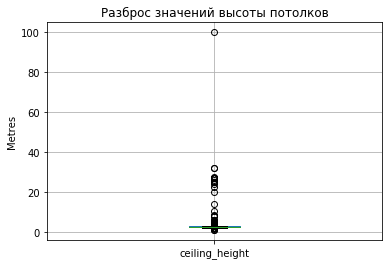

In [8]:
df.boxplot('ceiling_height')
plt.ylabel("Metres")
plt.title('Разброс значений высоты потолков')
plt.show()

Заметен выброс в виде 100-метрового потолка - его нужно убрать. Видно, что высота потолков преимущественно распределяется до 10 метров, остальные значения - скорее всего, ошибки при заполнении, которые лучше устранить.

Все значения выше 10 метров разделим на 10 - скорее всего при вводе данных человек ввёл лишний ноль.

In [9]:
df[df['ceiling_height'] == 100]
df = df.drop([22869])
df.reset_index(inplace=True, drop=True)

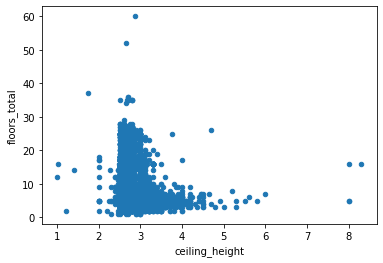

In [10]:
df.ceiling_height = df.ceiling_height.apply(lambda x: x if x < 10 else x / 10)
df.plot(kind='scatter', x='ceiling_height', y = 'floors_total') 
plt.show()

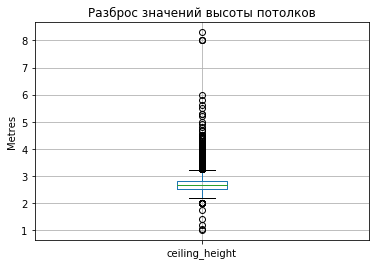

In [11]:
df.boxplot('ceiling_height')
plt.title('Разброс значений высоты потолков')
plt.ylabel('Metres')
plt.show()
#Боксплот все еще сильно сплющен. Очистим датасет от нетипичных значений

In [12]:
df.drop(df[df.ceiling_height <= 2].index, inplace=True)
df.drop(df[df.ceiling_height >= 3].index, inplace=True)
df.reset_index(drop=True)
df.shape

(21063, 22)

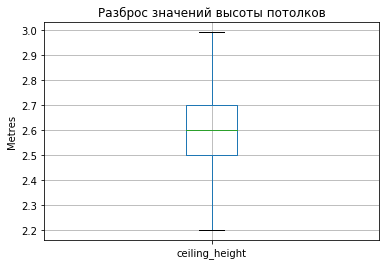

In [13]:
df.boxplot('ceiling_height')
plt.ylabel("Metres")
plt.title('Разброс значений высоты потолков')
plt.show()

<a id='section2.1.2'></a>

#### Аномалии в числе комнат

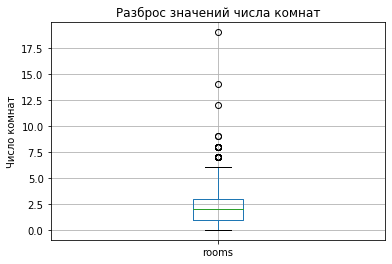

In [14]:
df.boxplot('rooms')
plt.title('Разброс значений числа комнат')
plt.ylabel('Число комнат')
plt.show()

На графике видно, что в данных присутствуют квартиры с 0 комнатами, нужно проверить все ли они являются студиями.

In [15]:
len(df[(df.rooms == 0) & (df.studio == False)])

58

Проверим площадь квартир:

In [16]:
df[(df.rooms == 0) & (df.studio == 0)]['total_area'].sort_values().tail(10)

7286     30.00
19735    30.50
6805     31.00
17805    31.10
7008     32.30
21628    34.00
508      34.40
4683     35.00
839      35.00
7237     42.63
Name: total_area, dtype: float64

Видно, что все квартиры не занимают площади больше 40 метров, за исключением одного выброса. Число квартир в них можно заменить на 1.

In [17]:
df.loc[(df.rooms == 0) & (df.studio == 0), 'rooms'] = 1

In [18]:
df.drop(df[df.rooms >= 7].index, inplace=True)
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21024,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
21025,9,4600000.0,62.4,2016-08-05T00:00:00,3,2.6,9.0,40.0,8,NaN,...,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
21026,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21027,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


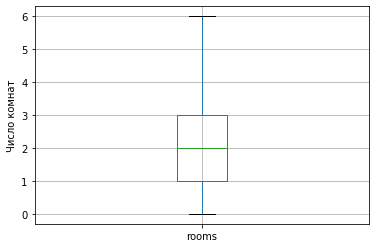

In [19]:
df.boxplot('rooms')
plt.ylabel('Число комнат')
plt.show()

<a id='section2.1.2'></a>

#### Стоимость закрытия

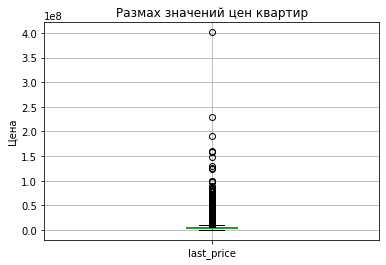

In [20]:
df.boxplot('last_price')
plt.ylabel('Цена')
plt.title('Размах значений цен квартир')
plt.show()

Удалим значения, превышающие 40 млн. От всех выбросов избавляться не будем, чтобы не потерять часть датасета, также интересную для изучения.

In [21]:
df.drop(df[df.last_price > 40000000].index, inplace=True)
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
4,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20958,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
20959,9,4600000.0,62.4,2016-08-05T00:00:00,3,2.6,9.0,40.0,8,NaN,...,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
20960,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20961,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='section2.1.4'></a>

#### Общая площадь

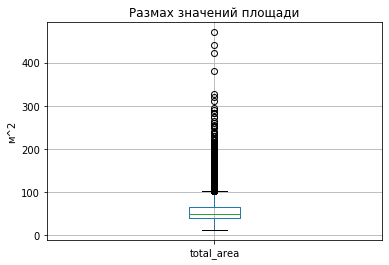

In [22]:
df.boxplot('total_area')
plt.title('Размах значений площади')
plt.ylabel('м^2')
plt.show()

In [23]:
df.drop(df[df.total_area > 300].index, inplace=True)
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
4,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20951,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
20952,9,4600000.0,62.4,2016-08-05T00:00:00,3,2.6,9.0,40.0,8,NaN,...,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
20953,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20954,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='section2.2'></a>

### Заполнение пропусков

Из описания данных нам известно, что в датасете много пропусков. Посмотрим, какие именно переменные содержат пропущенные значения и как мы можем на это повлиять.

In [24]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9106
floors_total               84
living_area              1714
floor                       0
is_apartment            18579
studio                      0
open_plan                   0
kitchen_area             2073
balcony                  9850
locality_name              42
airports_nearest         5339
cityCenters_nearest      5320
parks_around3000         5320
parks_nearest           14625
ponds_around3000         5320
ponds_nearest           13489
days_exposition          2572
dtype: int64

- Предположим, что если человек ничего не написал про балкон в своей кваритре, значит его нет. Заполним пропуски значениями False.
- Аналогичную операцию проведем с параметром "is_apartment" - если не уточнил, значет не апартаменты.
- Часть пропущенных значений в переменных ceiling_height, floors_total, parks_around3000, ponds_around3000,   parks_nearest,ponds_nearest можно заполнить поиском того же дома. Искать можно по расстоянию до аэропорта и до центра: с помощью параметров airports_nearest и cityCenters_nearest.

<a id='section2.2.1'></a>

#### Заполнение булевых значений

In [25]:
df.fillna(
    value = {
        'is_apartment': False,
        'balcony': False
            },
    inplace=True
)

<a id='section2.2.2'></a>

#### Заполнение пропусков этажности

In [26]:
floors_pivot = df.pivot_table(index='airports_nearest', columns='cityCenters_nearest', values='floors_total')
floors_pivot.index = floors_pivot.index.astype('int')
floors_pivot.columns = floors_pivot.columns.astype('int') #создадим сводную таблицу из расстояний до аэропорта и центра до дома,
                                                               # чтобы затем "вытаскивать" эти значения в цикле

for index, row in df[df['floors_total'].isna()].iterrows():
    airport = row['airports_nearest']
    center = row['cityCenters_nearest']
    try:
        df.loc[index, 'floors_total'] = floors_pivot.loc[airport, center]
    except:
        pass
print("По параметру 'floors_total' в датасете пропусков:", df['floors_total'].isna().sum())

По параметру 'floors_total' в датасете пропусков: 24


In [27]:
df['floors_total'].fillna(df['floors_total'].median(), inplace=True)
print("По параметру 'floors_total' в датасете пропусков:", df['floors_total'].isna().sum())

По параметру 'floors_total' в датасете пропусков: 0


<a id='section2.2.3'></a>

#### Обработка потолков

In [28]:
celing_pivot = df.pivot_table(index='airports_nearest', columns='cityCenters_nearest', values='ceiling_height')
celing_pivot.index = celing_pivot.index.astype('int')
celing_pivot.columns = celing_pivot.columns.astype('int')
for index, row in df[df['ceiling_height'].isna()].iterrows():
    airport = row['airports_nearest']
    center  = row['cityCenters_nearest']
    try:
        df.loc[index, 'ceiling_height'] = celing_pivot.loc[airport, center]
    except:
        pass
print("Пропусков:", df.ceiling_height.isna().sum())

Пропусков: 5797


<a id='section2.2.4'></a>

#### Расстояние до ближайшего парка

In [29]:
parks_pivot = df.pivot_table(index='airports_nearest', columns='cityCenters_nearest', values='parks_nearest')
parks_pivot.index = parks_pivot.index.astype(int)
parks_pivot.columns = parks_pivot.columns.astype(int)

In [30]:
print("Было пропусков:", df['parks_nearest'].isna().sum())
for index, row in df[df['parks_nearest'].isna()].iterrows():
    airport = row['airports_nearest']
    centre = row['cityCenters_nearest']
    try:
        df.loc[index, 'parks_nearest'] = parks_pivot.loc[airport, centre]
    except:
        pass
print("Стало пропусков:", df['parks_nearest'].isna().sum())

Было пропусков: 14625
Стало пропусков: 14606


Это немного, зато честно. Остальные переменные заполнять таким способом не имеет смысла, так как эксперементальными путем выяснилось, что это не результативно.

<a id='section2.2.5'></a>

#### Заполнение оставшихся пропусков

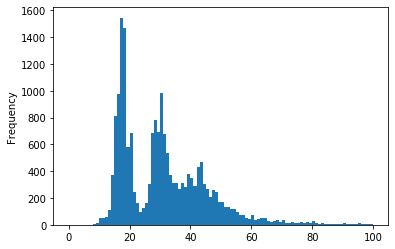

In [31]:
df.living_area.plot(kind='hist', bins=100, range=(0,100))
plt.show()

In [32]:
df.living_area.value_counts().head(15)

18.0    866
17.0    657
30.0    565
16.0    470
20.0    462
28.0    411
31.0    361
19.0    311
15.0    307
29.0    305
27.0    295
32.0    294
43.0    223
40.0    198
42.0    197
Name: living_area, dtype: int64

<a id='section2.2.6'><a/>

#### Переведение строки в формат даты

In [33]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,25.0,False,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


In [34]:
print('Нижняя граница по времени:', df['first_day_exposition'].min())
print('Верхняя граница по времени:', df['first_day_exposition'].max())

Нижняя граница по времени: 2014-11-27 00:00:00
Верхняя граница по времени: 2019-05-03 00:00:00


## Дополнение данных и поиск зависимостей

Добавим в данные для анализа дополнительные параметры:
- цена за квадратный метр;
- день недели;
- месяц;
- год
- столбец с этажом (первый/последний/другой)

<a id='section3.1'></a>

#### Цена, день недели, месяц, год

In [113]:
df['metre_price'] = df.last_price / df.total_area / 1000
df['weekday'] = df.first_day_exposition.dt.strftime('%a')
df['month'] = df.first_day_exposition.dt.strftime('%b')
df['year'] = df.first_day_exposition.dt.year
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,metre_price,weekday,month,year,floor_category,living_share,kitchen_share,centre_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,755.0,NaN,120.370370,Thu,Mar,2019,другой,0.472222,0.231481,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,81.0,82.920792,Tue,Dec,2018,первый,0.460396,0.272277,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,574.0,558.0,92.785714,Thu,Aug,2015,другой,0.612500,0.148214,14.0


<a id='section3.2'></a>

#### Столбец с этажом: первый, последний, другой

In [36]:
def floor_qualifier(row):
    last = row['floors_total']
    floor = row['floor']
    if floor == last:
        return "последний" 
    if floor == 1:
        return "первый"
    return "другой"

df['floor_category'] = df.apply(floor_qualifier, axis=1)
df.floor_category.value_counts()

другой       15606
последний     2799
первый        2551
Name: floor_category, dtype: int64

<a id='section3.3'></a>

#### Столбец "отношение жилой площади и кухни к общей площади"

Добавим также отношение жилой площади и кухни к общей площади:

In [37]:
df['living_share'] = df.living_area / df.total_area
df['kitchen_share'] = df.kitchen_area / df.total_area

___

<a id='section4'></a>

## Исследовательский анализ данных

<a id='section4.1'></a>

### Краткое изучение данных

Построим гистограммы распределения `площади квартиры`, `цены`, `числа комнат` и `высоты потолков`.

C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


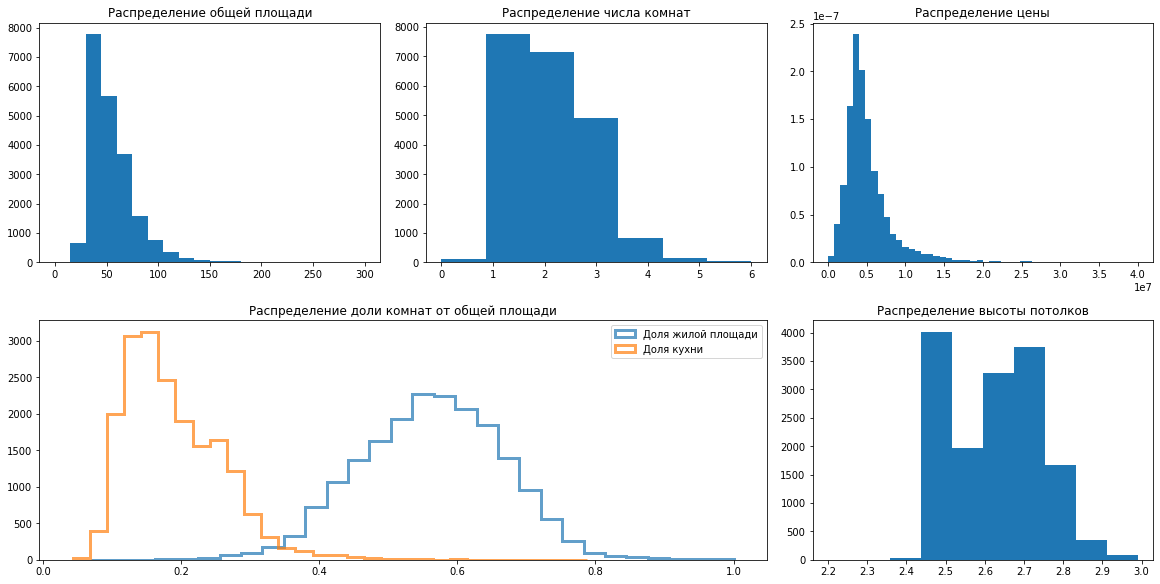

In [38]:
fig3 = plt.figure(figsize=(16,8), constrained_layout=True)
gs = fig3.add_gridspec(2, 3)

f3_ax1 = fig3.add_subplot(gs[0, 0])
f3_ax1.hist(x=df['total_area'], bins=20, range=(0, 300))
f3_ax1.set_title('Распределение общей площади')

f3_ax2 = fig3.add_subplot(gs[0, 1])
f3_ax2.hist(x=df['rooms'], bins=7)
f3_ax2.set_title('Распределение числа комнат')

f3_ax3 = fig3.add_subplot(gs[0, 2])
f3_ax3.hist(x=df['last_price'], density=True, bins=50, range=(12190,40000000))
f3_ax3.set_title('Распределение цены')

f3_ax4 = fig3.add_subplot(gs[1, 0:2])
f3_ax4.hist(df['living_share'], histtype='step', bins=30, lw=3, label='Доля жилой площади', alpha=0.7)# df[['living_share', 'kitchen_share']]   df['living_share'], df['kitchen_share']
f3_ax4.hist(df['kitchen_share'], histtype='step', bins=30, lw=3, label='Доля кухни', alpha=0.7)
f3_ax4.legend(loc='upper right')
f3_ax4.set_title('Распределение доли комнат от общей площади')

f3_ax5 = fig3.add_subplot(gs[1, 2])
plt.hist(x=df['ceiling_height'])
plt.title('Распределение высоты потолков')

plt.show()

#### Выводы из графиков

1. В датасете представлены `в большинстве квартиры меньше 50 квадратных метров`, на втором графике видно подтверждение - абсолютное большинство продаваемой недвижимости - одно- и двухкомнатные квартиры.
2. График цены похож на нормальное рапредление, скошенное положительно. `Наиболее частовстречаемая цена - 5 млн рублей`, квартиры дороже 10 млн - выбросы.
3. С наибольшей вероятностью кухня в продаваемой квартире будет занимать меньше 20%, а жилая площадь будет занимать шестую часть квартиры.
4. `Высота потолков` колеблется преимущественно `в диапозоне от 2.5 до 3 метров`, наиболее популярные варианты - это 2.5, 2.7 м, а также есть небольшой выброс в точке 3 м.

<a id='section4.2'></a>

### Зависимость цены от растояния до центра

Проверим зависимость цены закрытия от расстояния. Посмотрим, есть ли какая-то граница, отделяющая центр города от переферии с точки зрения цены и чему она равна.

In [39]:
df['centre_km'] = round(df.cityCenters_nearest / 1000)

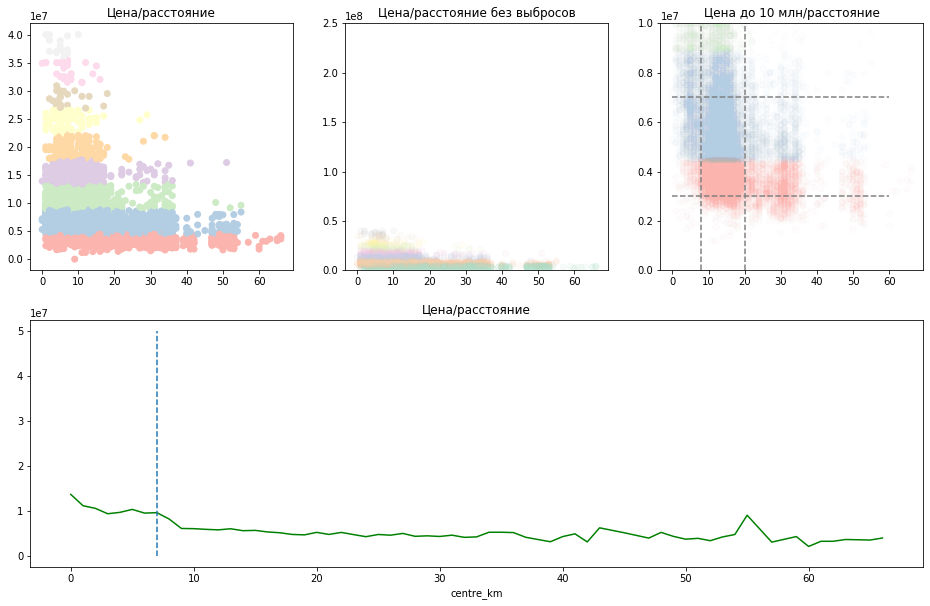

In [40]:
plt.figure(figsize=(16, 10))
plt.subplot2grid((2, 3), (0, 0))
plt.scatter(df.centre_km, df.last_price, c=df.last_price, cmap = 'Pastel1')
plt.title("Цена/расстояние")
plt.subplot2grid((2, 3), (0, 1))
plt.scatter(df.centre_km, df.last_price, c=df.last_price, cmap = 'Pastel2', alpha = 0.1)
plt.ylim(0, 250000000)   
plt.title("Цена/расстояние без выбросов")
plt.subplot2grid((2, 3), (0, 2))
plt.scatter(df.centre_km, df.last_price, c=df.last_price, cmap = 'Pastel1', alpha = 0.03)
plt.ylim(0, 10000000)
plt.title("Цена до 10 млн/расстояние")
plt.plot([8, 8], [0, 10000000], '--', color = 'gray')
plt.plot([20, 20], [0, 10000000], '--', color = 'gray')
plt.plot([0, 60], [3000000, 3000000], '--', color = 'gray')
plt.plot([0, 60], [7000000, 7000000], '--', color = 'gray')
plt.subplot2grid((2, 3), (1, 0), colspan=3)
df.groupby('centre_km')['last_price'].mean().plot(color='green')
plt.plot([7,7], [0, 50000000], '--')
plt.title("Цена/расстояние")
plt.show()

На первом графике прослеживается граница приблизительно в 10 км - все квартиры, продаваемые дороже 100 млн, находятся близко к центру Санкт-Петербурга.

Посомтрим на график ближе - удалим выбросы, то есть квартиры дороже 250 мл и зададим прозрачность - стало видно куда увеличивать. Ограничим график до 10 млн по оси ординат. Хорошо видно, что самые продаваемые квартиры - те, что находятся в диапазоне от 7 до 20 км и стоят от 3 до 8 млн рублей.

Нижний график более нагядно показывает границу в 7 км от центра - там, где цены на недвижимость начинают падать. Однако недвижимость за городом, на расстоянии 40 км начинает дорожать. Проверим, что за города находятся на таком расстоянии от Петербурга и оценим недвижимость там.

In [41]:
towns = df[df.centre_km > 40]
towns.last_price = round (towns.last_price / 1000000)
towns = towns.pivot_table(index='locality_name', values='last_price', aggfunc = ['count', 'mean', 'max'])
towns.columns = ['count', 'mean', 'max']
towns

C:\Anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,count,mean,max
locality_name,,,
Зеленогорск,22,5.272727,17.0
Красное Село,8,3.000000,4.0
Кронштадт,82,3.731707,8.0
Ломоносов,116,3.577586,9.0
Петергоф,31,4.483871,10.0
Сестрорецк,2,7.000000,8.0
посёлок Молодёжное,5,3.800000,4.0
посёлок Репино,2,4.500000,5.0


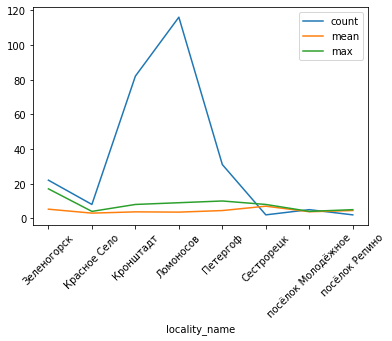

In [42]:
towns.plot()
plt.xticks(rotation = 45)
plt.show()

Получается, самый большой вклад в высокие цены "загородной" недвижимости дают квартиры Зеленогорска и Кронштадта - относительно остальных городов их много, а цены выше среднего.

<a id='section4.3'></a>

### Зависимость цены от площади и числа комнат

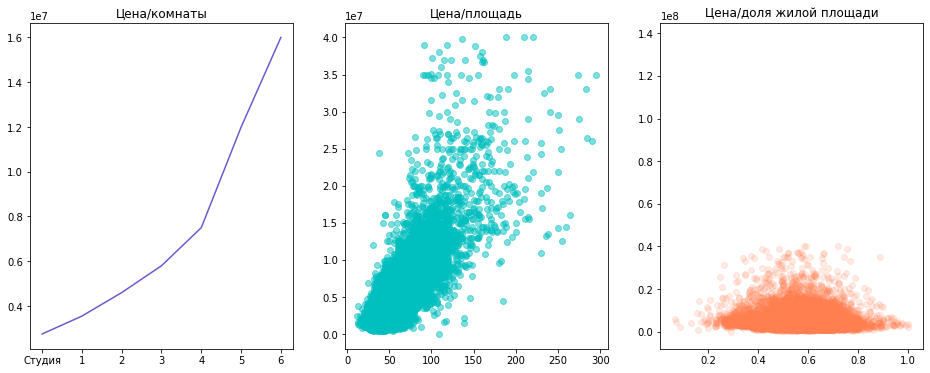

In [43]:
room_price = df[df.rooms < 7].groupby('rooms')['last_price'].median()
room_price.index = ['Студия', '1', '2', '3', '4', '5', '6']
plt.figure(figsize=(16, 6))
plt.subplot2grid((1, 3), (0, 0))
plt.plot(room_price.index, room_price, color='slateblue')
plt.title("Цена/комнаты")
plt.subplot2grid((1, 3), (0, 1))
plt.scatter(df.total_area, df.last_price, alpha=0.5, color = "c")
plt.title("Цена/площадь")
plt.subplot2grid((1, 3), (0, 2))
plt.scatter(df.living_share, df.last_price, alpha=0.15, color = "coral")
plt.ylim(-8000000,145000000)
plt.title("Цена/доля жилой площади")
plt.show()

1. На первом графике видна ожидаемая зависимость - чем больше комнат, тем дороже квартира. Значит даже посторонние факторы, такие как высота потолков, этаж, расположение не могут повлиять на эту зависимость.
2. Второй график демонстрирует похожую корреляцию - чем больше квартира, тем выше цена. Причем это правило неизменно до площади 200 кв.м. Далее в данных идет сильный разброс по этим параметрам.
3. Между критериями "цена" и "доля жилой площади" корреляция очень слаба.

<a id='section4.4'></a>

### Зависимость стоимости квартиры от этажа

Проверим коррецию этажа, на котором находится квартира, и ее стоимости. Для этого составим таблицу с медианной стоимостью квартир.

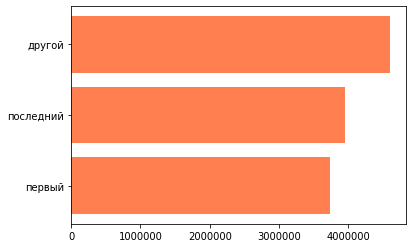

In [44]:
floor_price = df.pivot_table(index='floor_category', values='last_price', aggfunc='median').sort_values('last_price')
plt.barh(floor_price.index, floor_price.last_price, color='coral')
plt.show()

График показал, что квартры на первом этаже в среднем стоят дешевле. Половина из представленных в датасете квартир на первом этаже не продается дороже 3,8 млн рублей.  Квартиры на последнем этаже стоят в среднем дороже - их медианная стоимость около 4,2 млн рублей, цена на остальные квартиры в среднем чуть выше.

<a id='section4.5'></a>

### Как менялась стоимость квартир с 2014 года

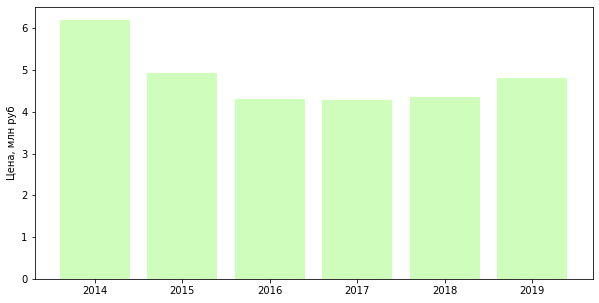

In [45]:
price_year = df.groupby('year')[['last_price']].median()
price_year.last_price = price_year.last_price / 1000000
plt.figure(figsize=(10,5))
plt.bar(price_year.index, price_year.last_price, color='#cffdbc')
plt.ylabel('Цена, млн руб')
plt.show()

In [46]:
for index, last_price in zip(price_year.index, price_year['last_price']):
    print(f'Медианное значение цены в {index} году было равно {last_price} млн рублей')

Медианное значение цены в 2014 году было равно 6.2 млн рублей
Медианное значение цены в 2015 году было равно 4.925 млн рублей
Медианное значение цены в 2016 году было равно 4.299 млн рублей
Медианное значение цены в 2017 году было равно 4.277531 млн рублей
Медианное значение цены в 2018 году было равно 4.35 млн рублей
Медианное значение цены в 2019 году было равно 4.8 млн рублей


#### Вывод:

С 2014 по 2016 наблюдается снижение медианной цены, однако затем падение остановилось и в 2019 году цены снова начали расти.

In [77]:
centre_flats = df[df.centre_km < 8]
other_flats = df[df.centre_km > 7]

(1899, 30)


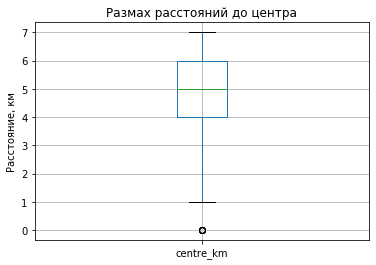

In [78]:
print(centre_flats.shape)

centre_flats.boxplot('centre_km')
plt.title('Размах расстояний до центра')
plt.ylabel('Расстояние, км')
plt.show()

Квартир в центре в датасете 1899, половина из них находится на расстоянии к центру ближе, чем на 5 км. Отфильтруем исходный датасет так, чтобы он не содержал в себе данных об этой недвижимости и сравним некоторые показатели.

Сделаем анализ еще детальнее: разделим выборку на квартиры на рассстоянии от центра в диапазонах от 0 до 5, от 6 до 7, от 8 до 13, от 13 и больше. Проанализируем цены: 

In [86]:
centre_5_flats = centre_flats[centre_flats.centre_km < 6]
centre_7_flats = centre_flats[centre_flats.centre_km > 5]
other_8_flats = other_flats[other_flats.centre_km < 14]
other_13_flats = other_flats[other_flats.centre_km > 13]

In [89]:
print(centre_5_flats.metre_price.median())
print(centre_7_flats.metre_price.median())
print(other_8_flats.metre_price.median())
print(other_13_flats.metre_price.median())

120.57976057906458
125.0
104.62287104622871
93.75


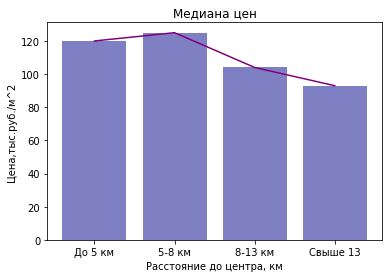

In [110]:
names = ['До 5 км', '5-8 км',  '8-13 км', 'Свыше 13']
values = [120, 125, 104, 93]
plt.bar(names, height=values, alpha=0.5, color='darkblue')
plt.plot(names, values, color='purple')
plt.title("Медиана цен")
plt.ylabel('Цена,тыс.руб./м^2')
plt.xlabel('Расстояние до центра, км')
plt.show()

- На графике виден ожидаемый тренд на снижение цен за квадратный метр при удалении от центра. Квдратный метр в центре в среднем оценивается в 120 тысяч рублей, тогда как на расстоянии 13 км от центра цена снижается до ~90тыс рублей.
- Однако, есть странный подъем в цене до 125 тыс.руб. в диапазоне от 5 до 7 км. На это можно придумать разные причины: возможно на этом расстоянии располагаются квартиры на Крестовском острове, а возможно на статистику повлияло удаление выбросов во время предобработки данных.
- Тем не менее, данные выглядят достоверно и ,таким образом, мы установили наиболее точные цены за квадратный метр в разных сегментах города.

Проверим, насколько квартиры в центре отличаются от остальных по следующим параметрам:
- среднняя площадь;
- высота потолков;
- число комнат.

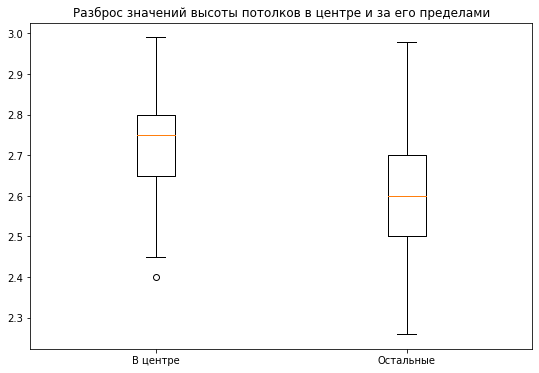

In [183]:
data_to_plot1 = [centre_flats.ceiling_height.dropna().tolist(), other_flats.ceiling_height.dropna().tolist()]

fig = plt.figure(figsize=(9, 6))

ax = fig.add_subplot(111)
ax.boxplot(data_to_plot1)
ax.set_xticklabels(['В центре', 'Остальные'])
plt.title('Разброс значений высоты потолков в центре и за его пределами')

plt.show()

У квартир в центре потолки значительно выше, проверим теперь площадь и число комнат:

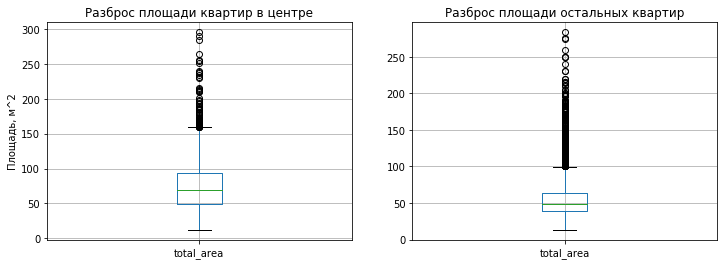

In [185]:
plt.figure(figsize=(12,4))
plt.subplot2grid((1,2), (0,0))
centre_flats.boxplot('total_area')
plt.ylabel('Площадь, м^2')
plt.title('Разброс площади квартир в центре')
plt.subplot2grid((1,2), (0,1))
other_flats.boxplot('total_area')

plt.title('Разброс площади остальных квартир')
plt.show()

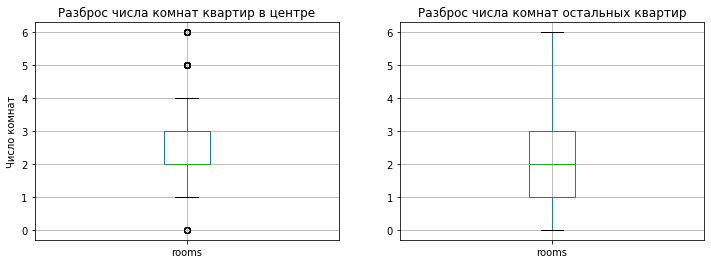

In [187]:
plt.figure(figsize=(12,4))
plt.subplot2grid((1,2), (0,0))
centre_flats.boxplot('rooms')
plt.ylabel('Число комнат')
plt.title('Разброс числа комнат квартир в центре')
plt.subplot2grid((1,2), (0,1))
other_flats.boxplot('rooms')

plt.title('Разброс числа комнат остальных квартир')
plt.show()

Недвижимость в центре отличается большей площадью (медиана 75 м^2 против 50 не в центре, а верхний квартиль близок к 100 м^2, что гораздо выше остальных квартир), а также более высокими потолками. Медианное число комнат равно (2), однако двух- и трехкомнатных квартир гораздо больше среди недвижимости в центре.

___

<a id='section4.6'></a>

### Изучение даты продажи

#### Поиск зависимости цены от даты выставления

In [48]:
df[(df.locality_name == 'Санкт-Петербург')].groupby('month')['metre_price'].median()

month
Apr    104.685942
Aug    103.498572
Dec    103.846154
Feb    102.808081
Jan    103.746658
Jul    101.762149
Jun    101.562500
Mar    105.911330
May    100.000000
Nov    102.059925
Oct    100.943396
Sep    104.580956
Name: metre_price, dtype: float64

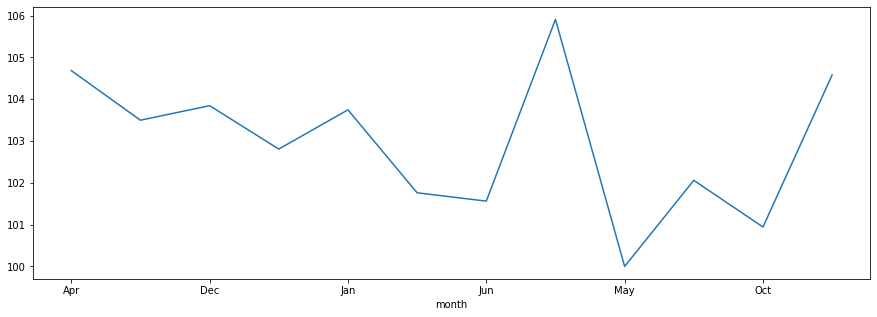

In [114]:
plt.figure(figsize=(15,5))
df[(df.locality_name == 'Санкт-Петербург')].groupby('month')['metre_price'].median().plot(x='month', y='metre_price')
plt.show()

Самая низкая медианная цена наблюдается мае, в этом месяце половина из всех квартир в датасете не продавалась дороже 100 тыс за квадратный метр. Дороже всего квартиры продаются в начале весны. В марте цены за квадратный метр приблизительно равны 105 тыс рублей. Однако, разница в 5 тыс.руб. незначительная и можно сделать вывод, что цены на квартиры практически не меняются в течение года.

Теперь проверим, влияет ли день недели, в который было размещено объявление, на стоимость квартиры.

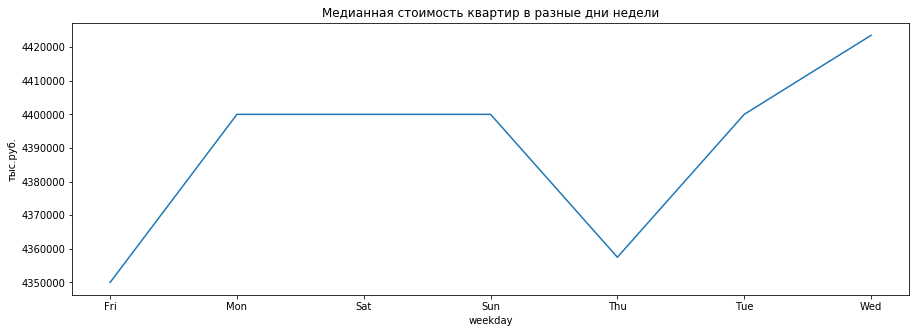

In [50]:
plt.figure(figsize=(15,5))
df.groupby('weekday')['last_price'].median().plot(x='weekday', y='last_price')
plt.title('Медианная стоимость квартир в разные дни недели')
plt.ylabel('тыс.руб.')
plt.show()

Из графика видна еще одна тенденция: объявления с наиболее дешевыми квартирами размещаются чаще всего в пятницу и четверг, а самые дорогие по средам.

#### Как долго продаются квартиры?

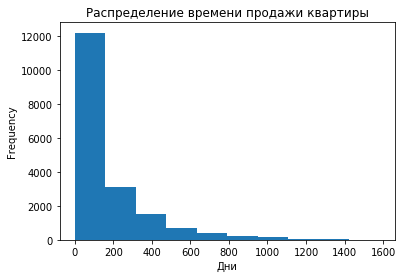

Среднее время продажи: 172.30162097476065
Медианное время продажи: 91.0


In [73]:
df.days_exposition.plot(kind='hist')
plt.title('Распределение времени продажи квартиры')
plt.xlabel('Дни')
plt.show()

print('Среднее время продажи:', df.days_exposition.mean())
print('Медианное время продажи:', df.days_exposition.median())

Получается, если квартиру продали меньше, чем за 90 дней - то сделку можно считать совершенной быстро. Существуют и квартиры, продающиеся уже больше 1500 дней~4 года, что на фоне остальных продаж выглядит довольно долго. Возможно, владельцы квартир забыли про эти объявления и продали кваритру на другой платформе.

<a id='section4.7'></a>

### Цены за квадратный метр

Проверим среднюю цену за квадратный метр квартир с 1, 2 и 3 комнатами.

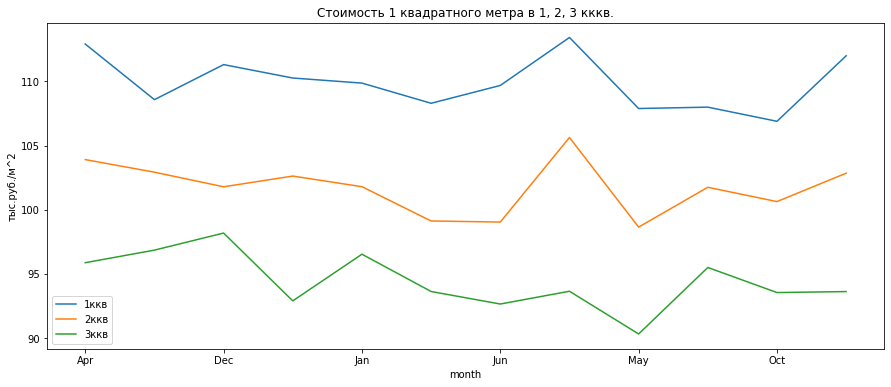

In [51]:
plt.figure(figsize=(15,6))
df[(df.locality_name == 'Санкт-Петербург') & (df.rooms == 1)].groupby('month')['metre_price'].median().plot(x='month', y='metre_price')
df[(df.locality_name == 'Санкт-Петербург') & (df.rooms == 2)].groupby('month')['metre_price'].median().plot(x='month', y='metre_price')
df[(df.locality_name == 'Санкт-Петербург') & (df.rooms == 3)].groupby('month')['metre_price'].median().plot(x='month', y='metre_price')
plt.legend(['1ккв', '2ккв', '3ккв'])
plt.ylabel('тыс.руб./м^2')
plt.title('Стоимость 1 квадратного метра в 1, 2, 3 кккв.')
plt.show()

`Самый дорогой` квадратный метр - `в однокомнатных квартирах` - его цена обычно `превышает 110 тыс рублей` и не опускается ниже 105 тысяч, данее цена уменьшается с увеличением числа комнат. В трехкомнатных квартирах цена квадратного метра может достигать стоимости 90 тыс рублей.

<a id='section4.8'></a>

### Анализ предложения апартаментов и поиск зависимости типа жилья и цены на недвижимость


In [56]:
apartment_count = df[(df.year != 2014) & (df.year != 2019)].groupby('year')[['is_apartment']].count()
apartment_price = df[df.is_apartment == True].groupby('year')[['last_price']].median()
apartment_area = df[df.is_apartment == True].groupby('year')[['total_area']].median()
apartment_centre = df[df.is_apartment == True].groupby('year')[['centre_km']].median()

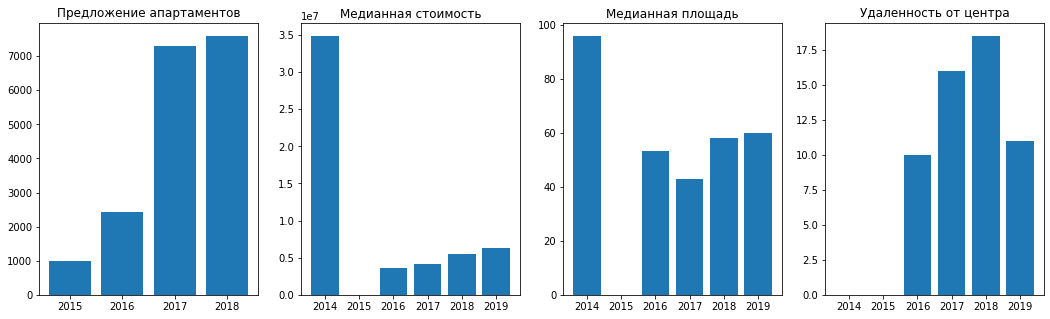

In [57]:
plt.figure(figsize=(18, 5))
plt.subplot2grid((1,4), (0,0))
plt.bar(apartment_count.index,apartment_count.is_apartment)
plt.title('Предложение апартаментов')
plt.subplot2grid((1,4), (0,1))
plt.bar(apartment_price.index,apartment_price.last_price)
plt.title('Медианная стоимость')
plt.subplot2grid((1,4), (0,2))
plt.bar(apartment_area.index,apartment_area.total_area)
plt.title('Медианная площадь')
plt.subplot2grid((1,4), (0,3))
plt.bar(apartment_centre.index,apartment_centre.centre_km)
plt.title('Удаленность от центра')
plt.show()

Предложение апартаментов сильно выросло с 2016 года. Прирост продаваемых апартаментов составил 250%, таким образом предложение увеличилось до 7 тысяч - это 35% датасета. Однако, как мы помним из графика динамики стоимости, в этот период цены на недвижимость практически не изменились, следовательно информация о типе жилья (апартаменты или нет) ,вероятнее всего, не является существенной для определения цены. Проверим эту гипотезу с помощью визуализации, построим боксплот.

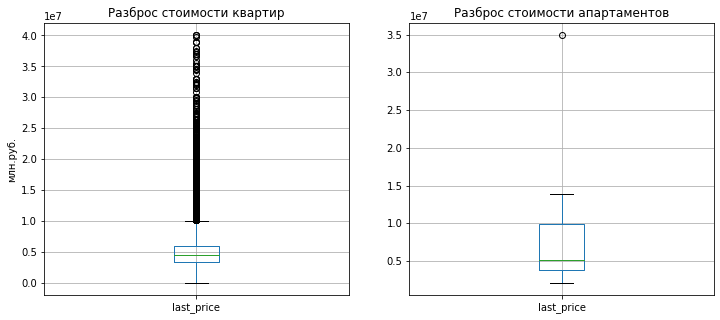

Медианная стоимость апартаментов: 5089500.0
Медианная стоимость квартир: 4400000.0


In [58]:
plt.figure(figsize=(12, 5))
plt.subplot2grid((1,2), (0,0))
df[df.is_apartment == False].boxplot('last_price')
plt.title('Разброс стоимости квартир')
plt.ylabel('млн.руб.')
plt.subplot2grid((1,2), (0,1))
df[df.is_apartment == True].boxplot('last_price')
plt.title('Разброс стоимости апартаментов')
plt.show()
print('Медианная стоимость апартаментов:', df[df.is_apartment == True].last_price.median())
print('Медианная стоимость квартир:', df[df.is_apartment == False].last_price.median())

На оба типа недвижимости медианная цена составляет 5 млн рублей, что подтверждает нашу гипотезу об отсутсвиии разницы в цене. Однако на графике размаха цен на квартиры можно заметить, что верхний и нижний квартиль гораздо меньше, чем на графике размаха цен апартаментов. Верхний квартиль у квартир равен 6 млн, тогда как тот же показатель для апартаментов равен практически 10 млн рублей. Эту разницу может компенсировать большое число выбросов на графике с квартирами, что еще раз подтверждает, что нельзя делать вывод о цене по типу жилья. Дополним проверкой статистической гипотезы:

In [64]:
df_apartment = df[df.is_apartment == True]
df_flat = df[df.is_apartment == False] # создаем датачеты отдельно для квартир и для апартаментов

results = st.ttest_ind(df_apartment.last_price, df_flat.last_price, equal_var=False)


print('p-value:', results.pvalue)

if results.pvalue < .05:
    print("Отвергаем нулевую гипотезу. Средняя стоимость отличается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя стоимость одинакова.")

p-value: 0.1750988550290551
Не получилось отвергнуть нулевую гипотезу. Средняя стоимость одинакова.


### Выводы

1. На первом шаге при знакомстве с датасетом были обнаружены множественные пропуски, а также много аномалий, от которых мы в последствии успешно избавились. 
2. На втором этапе для пропущенных значений этажности и высоты потолков домов были восстановлены значения по доступным данным из датасета. Изменены типы данных, обработаны выбросы и аномальные значения.
3. На третьем шаге были посчитаны и добавлены в таблицу:
    1. цена квадратного метра;
    2. день недели, месяц и год публикации объявления;
    3. этаж квартиры; варианты — первый, последний, другой;
    4. соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. В результате анализа были получены следующие выводы:


- Цены на квартиры растут пропорционально числу комнат и площади и обратнопропорцианально удаленности от центра города;

- Граница центра города с точки зрения стоимости - 8 км;
- Квартиры на первом этаже обычно стоят дешевле, квартиры на последнем этаже в среднем не самые дорогие;
- Чаще всего квартира продается не более, чем за 90 дней;
- Стоимость квартиры не зависит от того, в какое время года она продается;
- С 2014 года цены на кваритры снизились на 1,6 млн исходя из медианных значений;
- Самые дорогие квартиры на расстоянии 40 км находятся в Кронштадте;
- Квартиры в центре облаюат болшей площадью, а также более высокими потолками, среди квартир в центре также больше двух- и трехкомнатных квартир;
- Средняя стоимость квартир и апартаментов не отличается;